In [3]:
import sys 
print(sys.executable)

c:\Users\HITECH\Desktop\Image processing\kapda\Scripts\python.exe


In [20]:
import tensorflow as tf
from tensorflow import keras 

In [21]:
keras.__version__

'3.6.0'

In [22]:
fashion_mnist = keras.datasets.fashion_mnist

In [90]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [91]:
import matplotlib.pyplot as plt


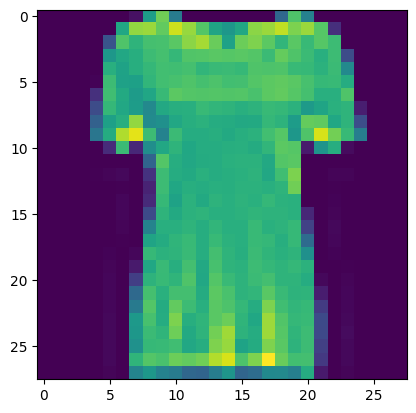

In [92]:
plt.imshow(X_train_full[10])

In [93]:
y_train_full[10]

0

In [94]:
class_names = ["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split( X_test_full,y_test_full ,test_size=0.2, random_state=42)

In [97]:
X_train_n = X_train_full/255.
X_test_n=X_test_full/255.

In [98]:
X_valid , X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [99]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [100]:
import numpy as np


In [101]:
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


c:\Users\HITECH\Desktop\Image processing\kapda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Pydot : 
pydot is a Python interface to Graphviz, which allows you to create, handle, and manipulate graph structures and export them in a variety of formats, including diagrams like flowcharts and neural network models

In [104]:
import pydot
keras.utils.plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [105]:
!pip install pydot

In [106]:
import pydot

In [107]:
keras.utils.plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [108]:
weights,biases = model.layers[1].get_weights()

In [109]:
weights

array([[-0.02297412, -0.03085996, -0.05095099, ..., -0.00055548,
         0.0519774 , -0.05968344],
       [-0.01835829, -0.00757836,  0.06413122, ..., -0.00715199,
         0.00133339, -0.06688441],
       [-0.00487231, -0.00673026, -0.02570561, ...,  0.0339999 ,
         0.06706499, -0.05672862],
       ...,
       [-0.06766737,  0.01726125, -0.0111113 , ...,  0.06238484,
        -0.05535005,  0.03053992],
       [ 0.03223976,  0.00886366,  0.03312223, ..., -0.0198985 ,
         0.03645106, -0.01791633],
       [ 0.00844999, -0.02168213,  0.04076304, ..., -0.00397326,
         0.05806617,  0.05568513]], dtype=float32)

In [110]:
weights.shape

(784, 300)

In [111]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [112]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

 model_history object in  which it contains details about the training process, such as loss and accuracy for both training and validation datasets.

In [113]:
model_history = model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6704 - loss: 1.0371 - val_accuracy: 0.8162 - val_loss: 0.5354
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8230 - loss: 0.5069 - val_accuracy: 0.8392 - val_loss: 0.4646
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8424 - loss: 0.4508 - val_accuracy: 0.8524 - val_loss: 0.4290
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8524 - loss: 0.4195 - val_accuracy: 0.8592 - val_loss: 0.4065
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8605 - loss: 0.3974 - val_accuracy: 0.8622 - val_loss: 0.3919
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8669 - loss: 0.3800 - val_accuracy: 0.8664 - val_loss: 0.3783
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8697 - loss: 0.3658 - val_accuracy: 0.8678 - val_loss: 0.3687
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8739 - loss: 0.3537 -

epochs means no. of complete process through entire traininng dataset

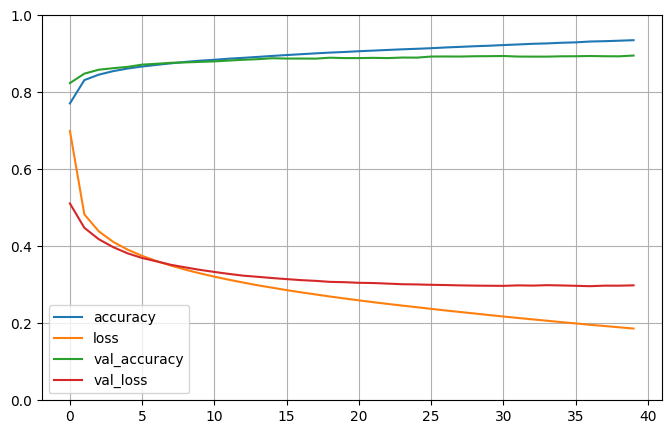

In [56]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

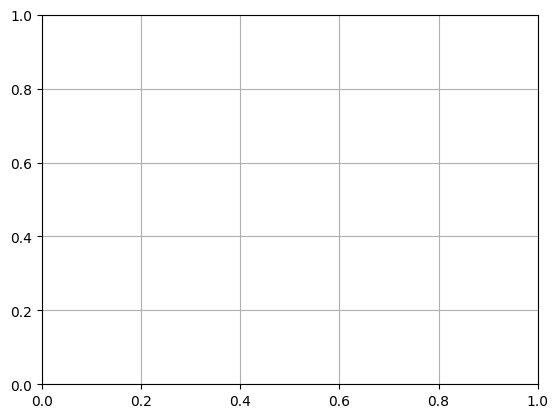

In [57]:
plt.grid(True)

(0.0, 1.0)

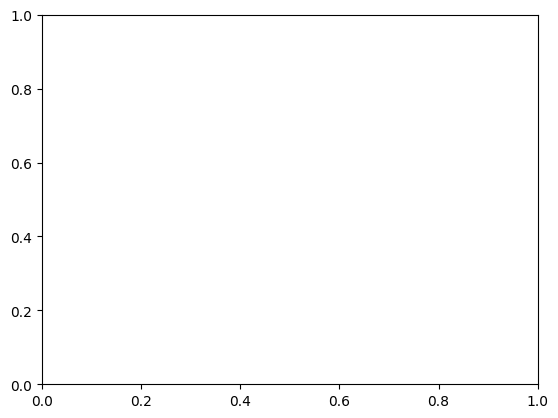

In [58]:
plt.gca().set_ylim(0,1)

In [59]:
plt.show()

In [81]:
# from sklearn.model_selection import train_test_split

In [82]:
# X_train, X_test, y_train, y_test = train_test_split( X_test_full,y_test_full ,test_size=0.2, random_state=42)

In [83]:
# model = keras.models.Sequential()

In [85]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.evaluate(X_test,y_test)

ValueError: Sequential model sequential_5 cannot be built because it has no layers. Call `model.add(layer)`.

In [77]:
X_new =     X_test[:5]

In [79]:
y_proba = model.predict(X_new)

ValueError: Sequential model sequential_5 cannot be built because it has no layers. Call `model.add(layer)`.

In [64]:
y_pred = model.predict(X_new)

ValueError: Sequential model sequential_4 cannot be built because it has no layers. Call `model.add(layer)`.